<a href="https://colab.research.google.com/github/mnngit/100DML/blob/main/D36Handling_missing_numerical_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv('/content/drive/MyDrive/100DML/datasets/titanic_toy.csv')

In [5]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [7]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [8]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [11]:
X_train.isnull().mean()

Age       0.196629
Fare      0.050562
Family    0.000000
dtype: float64

In [12]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [14]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

In [15]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
283,19.0,8.0500,0,19.0,19.000000,8.0500,8.0500
631,51.0,7.0542,0,51.0,51.000000,7.0542,7.0542
28,NaN,7.8792,0,28.0,29.498846,7.8792,7.8792
113,20.0,9.8250,1,20.0,20.000000,9.8250,9.8250
279,35.0,20.2500,2,35.0,35.000000,20.2500,20.2500


In [17]:
print('Original age variable variance: ', X_train['Age'].var())
print('Age variance after median imputation: ', X_train['Age_median'].var())
print('Age variance after mean imputation: ', X_train['Age_mean'].var())

print('Original fare variable variance: ', X_train['Fare'].var())
print('Fare variance after median imputation: ', X_train['Fare_median'].var())
print('Fare variance after mean imputation: ', X_train['Fare_mean'].var())


Original age variable variance:  210.2517072477435
Age variance after median imputation:  169.20731007048155
Age variance after mean imputation:  168.85193366872227
Original fare variable variance:  2761.0314349486343
Fare variance after median imputation:  2637.012481677765
Fare variance after mean imputation:  2621.232374951235


In [18]:
2637/2761*100

95.508873596523

In [19]:
168/210*100

80.0

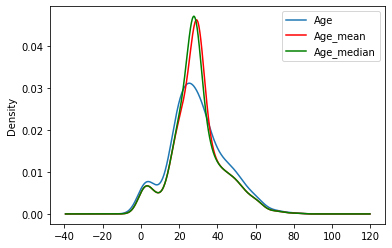

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# After mean imputation
X_train['Age_mean'].plot(kind='kde', ax=ax, color='red')

# After median imputation
X_train['Age_median'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best') 


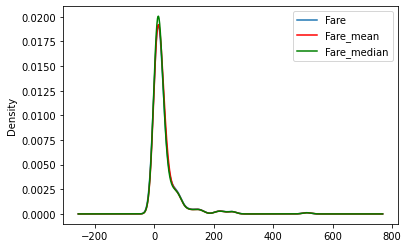

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='red')

# variable imputed with median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [24]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,70.082085,71.193767
Fare,75.481375,2761.031435,18.599163,63.938058,60.224654,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.587710,-5.616299,17.672035,17.657433
Age_median,210.251707,63.938058,-5.587710,169.207310,168.851934,59.728510,60.700688
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,56.282518,57.175304
Fare_median,70.082085,2761.031435,17.672035,59.728510,56.282518,2637.012482,2621.232375
Fare_mean,71.193767,2761.031435,17.657433,60.700688,57.175304,2621.232375,2621.232375


In [26]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.087232,0.088944
Fare,0.091482,1.000000,0.207193,0.093496,0.088151,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.255307,-0.256883,0.204536,0.204981
Age_median,1.000000,0.093496,-0.255307,1.000000,0.998949,0.089416,0.091145
Age_mean,1.000000,0.088151,-0.256883,0.998949,1.000000,0.084346,0.085941
Fare_median,0.087232,1.000000,0.204536,0.089416,0.084346,1.000000,0.997003
Fare_mean,0.088944,1.000000,0.204981,0.091145,0.085941,0.997003,1.000000


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


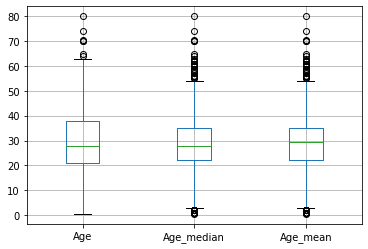

In [27]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


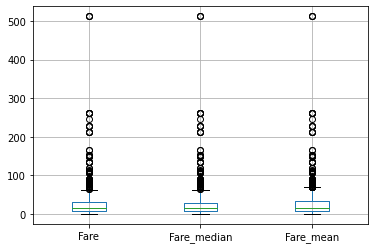

In [28]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

# **Using sklearn**

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [31]:
imputer1=SimpleImputer(strategy='median')
imputer2=SimpleImputer(strategy='mean')

In [33]:
trf = ColumnTransformer([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare'])
], remainder='passthrough')

In [34]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [38]:
trf.named_transformers_['imputer1'].statistics_

array([28.])

In [36]:
trf.named_transformers_['imputer2'].statistics_

array([32.51778772])

In [39]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [40]:
X_train

array([[ 45.5       ,  28.5       ,   0.        ],
       [ 23.        ,  13.        ,   0.        ],
       [ 32.        ,   7.925     ,   0.        ],
       ...,
       [ 41.        ,  32.51778772,   2.        ],
       [ 14.        , 120.        ,   3.        ],
       [ 21.        ,  77.2875    ,   1.        ]])